In [ ]:
# Merge different method in all years into one table
from .DataProcess.mergeData import mergeData
mergeData("China_Acc_Results")

In [5]:
# Get data for analysis
import os
import pandas as pd
import geopandas as gpd
import numpy as np
BASE_MAP = gpd.read_file("ArcGIS\\ChinaDynam.gdb", layer="CNMap_City", encoding="utf-8")
RESULT = pd.read_csv(os.path.join("China_Acc_Results", "Result", "city_efficiency.csv"), encoding="utf-8")
RESULT = RESULT[RESULT["name"] != u"境界线"]

# Clean Gini Nan
for y in range(2015, 2026):
    RESULT.loc[RESULT["Relative_Accessibility_{}".format(y)].isna(), "M2SFCA_Gini_{}".format(y)] = np.nan

In [ ]:
# Print
from DataProcess.drawBasicMap import draw152535
draw152535(RESULT.copy(), BASE_MAP)

efficiency

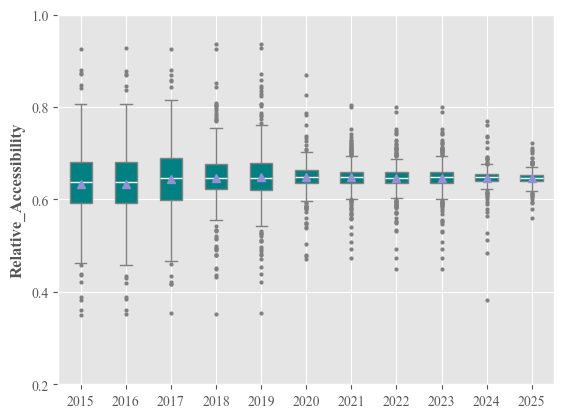

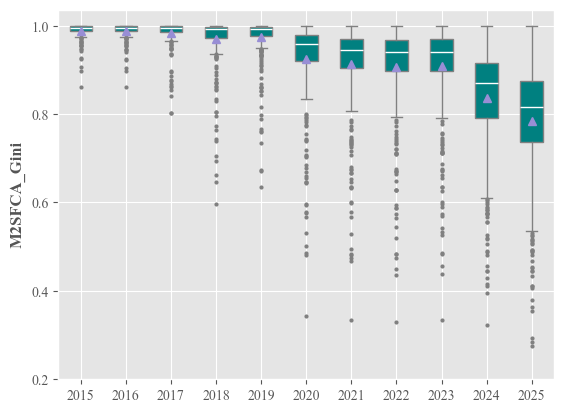

In [ ]:
# Boxplot of efficiency
from DataProcess.boxPlot import boxPlot
boxPlot(RESULT.copy(), "Relative_Accessibility")
boxPlot(RESULT.copy(), "M2SFCA_Gini")

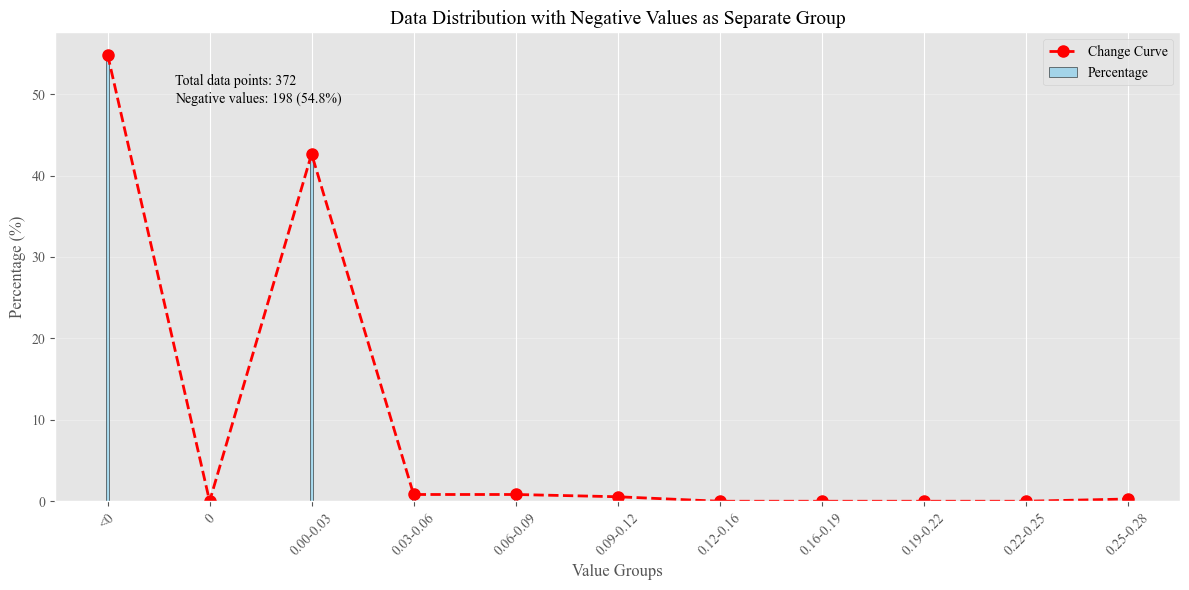

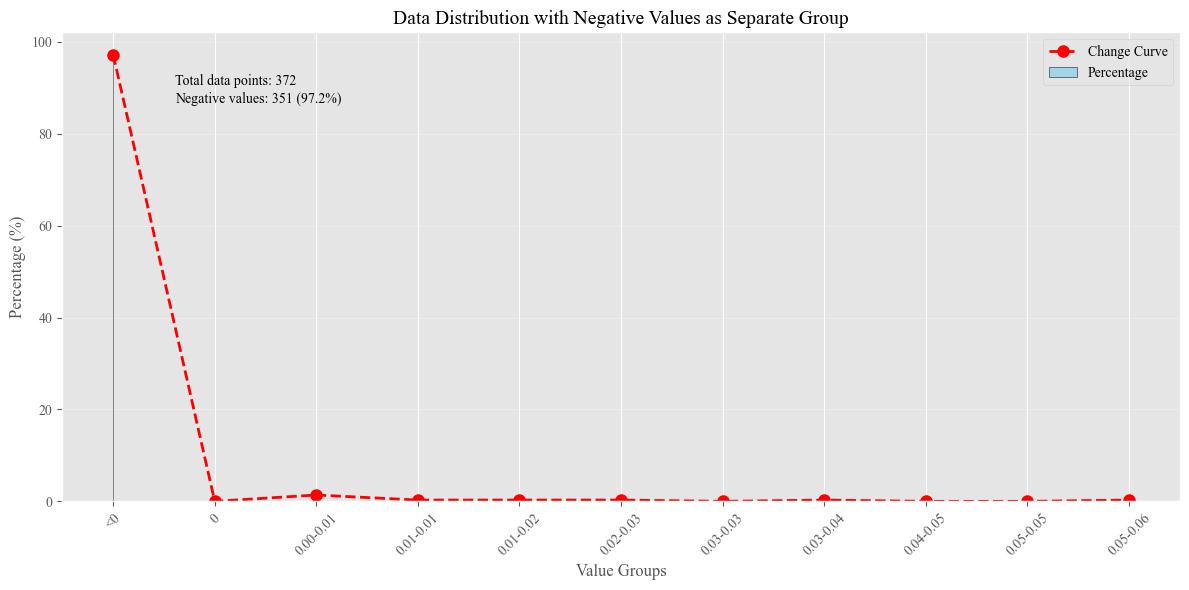

In [ ]:
# Proportional distribution with different levels of improvement in efficiency from 2015 to 2025
from DataProcess.improvement import improvement
improvement(RESULT.copy(), "Relative_Accessibility")
improvement(RESULT.copy(), "M2SFCA_Gini")

In [ ]:
# Cities in China lacking any charging efficiency throughout the entire decade
for y in range(2015, 2026):
    a = set(RESULT[RESULT["Relative_Accessibility_{}".format(y)].isna()]["name"].to_list())
    a = a & a
    print(a)

{'三沙市', '昌都市', '吉林市', '遂宁市', '贵阳市', '玉溪市', '孝感市', '儋州市', '锦州市', '内江市', '河源市', '丽江市', '黔西南布依族苗族自治州', '保山市', '百色市', '南充市', '安顺市', '新星市', '玉树藏族自治州', '黄冈市', '朝阳市', '庆阳市', '丽水市', '汉中市', '伊春市', '盘锦市', '乌海市', '潮州市', '阿里地区', '白沙黎族自治县', '凉山彝族自治州', '固原市', '来宾市', '巴中市', '白城市', '六盘水市', '商洛市', '广安市', '宜昌市', '运城市', '丹东市', '通辽市', '怒江傈僳族自治州', '琼中黎族苗族自治县', '梧州市', '屯昌县', '阿克苏地区', '楚雄彝族自治州', '毕节市', '图木舒克市', '池州市', '太子山天然林保护区', '昆玉市', '四平市', '大兴安岭地区', '万宁市', '黄南藏族自治州', '荆州市', '黑河市', '咸宁市', '岳阳市', '乐东黎族自治县', '郴州市', '钦州市', '临夏回族自治州', '东营市', '揭阳市', '林芝市', '大理白族自治州', '海东市', '迪庆藏族自治州', '阜阳市', '伊犁哈萨克自治州', '汕尾市', '恩施土家族苗族自治州', '可克达拉市', '铁门关市', '巴彦淖尔市', '文昌市', '三明市', '衡阳市', '陇南市', '崇左市', '金昌市', '白山市', '延安市', '邵阳市', '黔东南苗族侗族自治州', '辽阳市', '山南市', '铜川市', '安康市', '铜陵市', '渭南市', '甘南藏族自治州', '中农发山丹马场', '天门市', '阿拉尔市', '双河市', '广元市', '莆田市', '阿坝藏族羌族自治州', '贵港市', '果洛藏族自治州', '和田地区', '安庆市', '白杨市', '张家界市', '甘孜藏族自治州', '益阳市', '锡林郭勒盟', '神农架林区', '铁岭市', '黔南布依族苗族自治州', '赣州市', '临沧市', '武威市', '昌江黎族自治县', '定西市', '石河子市', '白银市', '琼海市', '红河哈尼族彝族自治

In [2]:
# Clusting analysis
from DataProcess.clusting import clusting
a = clusting(RESULT.copy(), BASE_MAP.copy())

In [ ]:
a.calMoranI("Relative_Accessibility", 0.5)
a.calMoranI("Gini_efficiency", 0.5)


Relative_Accessibility do not have sptial correaltion.
Gini_Accessibility do not have sptial correaltion.


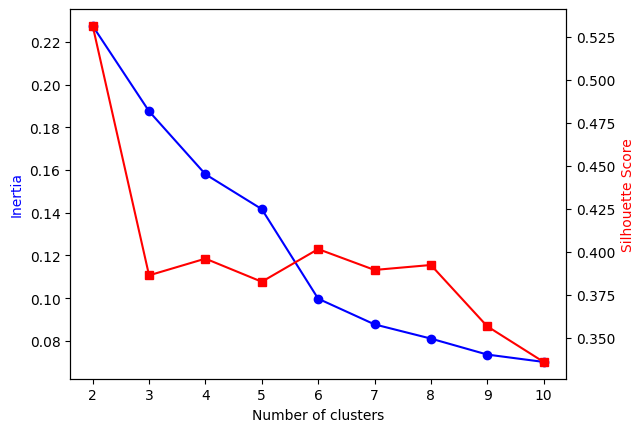

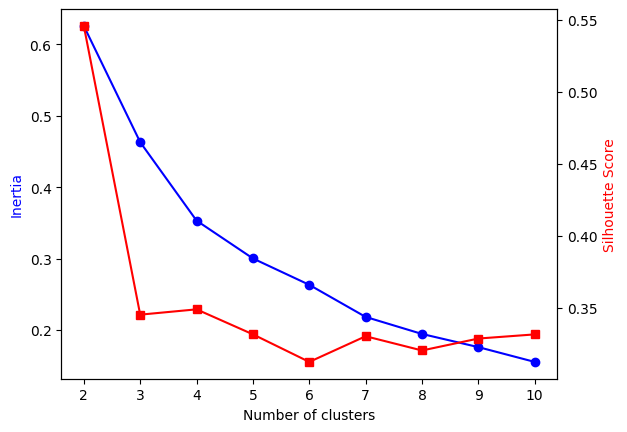

In [ ]:
a.showK("Relative_Accessibility")
a.showK("M2SFCA_Gini")

Cluster 0: ['鄂州市', '舟山市', '朝阳市', '广安市', '濮阳市', '宣城市', '六盘水市', '深圳市', '三明市', '景德镇市', '楚雄彝族自治州', '大连市', '攀枝花市', '贺州市', '西安市', '淮北市', '邵阳市', '石家庄市', '汕尾市', '荆门市', '衢州市', '迪庆藏族自治州', '葫芦岛市', '济南市', '贵阳市', '珠海市', '长春市', '延边朝鲜族自治州', '萍乡市', '庆阳市', '泉州市', '自贡市', '临沂市', '百色市', '鞍山市', '唐山市', '岳阳市', '河源市', '孝感市', '金华市', '兴安盟', '雅安市', '亳州市', '商洛市', '盐城市', '汕头市', '安顺市', '黔南布依族苗族自治州', '厦门市', '阿克苏地区', '红河哈尼族彝族自治州', '太原市', '常德市', '牡丹江市', '淮南市', '德阳市', '威海市', '绍兴市', '池州市', '淮安市', '黔东南苗族侗族自治州', '莆田市', '南昌市', '佛山市', '昆明市', '张家界市', '泸州市', '沈阳市', '邯郸市', '马鞍山市', '三亚市', '十堰市', '呼和浩特市', '德宏傣族景颇族自治州', '枣庄市', '安阳市', '阳泉市', '保亭黎族苗族自治县', '鹰潭市', '乐东黎族自治县', '龙岩市', '天门市', '潜江市', '邢台市', '仙桃市', '绥化市', '丹东市', '滨州市', '镇江市', '昌江黎族自治县', '周口市', '白沙黎族自治县', '临高县', '澄迈县', '长沙市', '屯昌县', '定安县', '海口市', '乐山市', '凉山彝族自治州', '桂林市', '东营市', '鹤壁市', '锡林郭勒盟', '琼中黎族苗族自治县', '长治市', '通化市', '上海市', '鸡西市', '宁德市', '保定市', '菏泽市', '崇左市', '黑河市', '驻马店市', '哈密市', '锦州市', '肇庆市', '恩施土家族苗族自治州', '宜昌市', '平凉市', '青岛市', '新乡市', '乌海市', '黔西南布依族苗族自治州', '广州市', '吉林市', 

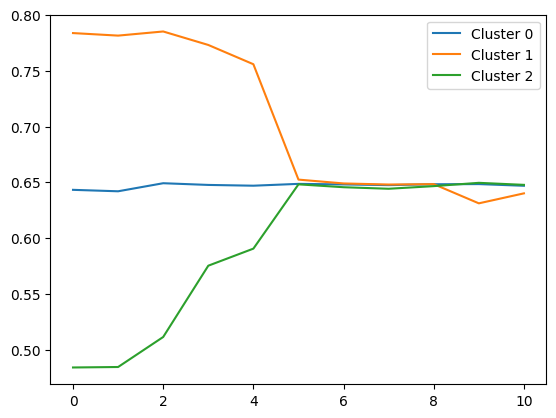

Cluster 0: ['梅州市', '鄂州市', '吕梁市', '舟山市', '朝阳市', '广安市', '濮阳市', '宣城市', '六盘水市', '三明市', '景德镇市', '楚雄彝族自治州', '大连市', '贺州市', '邵阳市', '荆门市', '衢州市', '迪庆藏族自治州', '宜宾市', '葫芦岛市', '长春市', '延边朝鲜族自治州', '萍乡市', '庆阳市', '自贡市', '临沂市', '百色市', '鞍山市', '铜陵市', '唐山市', '岳阳市', '河源市', '孝感市', '兴安盟', '盘锦市', '雅安市', '亳州市', '商洛市', '盐城市', '安顺市', '黔南布依族苗族自治州', '阿克苏地区', '红河哈尼族彝族自治州', '甘南藏族自治州', '常德市', '牡丹江市', '淮南市', '德阳市', '威海市', '秦皇岛市', '阳江市', '铁岭市', '达州市', '池州市', '淮安市', '遵义市', '黔东南苗族侗族自治州', '莆田市', '大同市', '张家界市', '泸州市', '邯郸市', '马鞍山市', '日照市', '德宏傣族景颇族自治州', '梧州市', '枣庄市', '安阳市', '怀化市', '阳泉市', '保亭黎族苗族自治县', '鹰潭市', '博尔塔拉蒙古自治州', '乐东黎族自治县', '辽源市', '齐齐哈尔市', '龙岩市', '天门市', '潜江市', '邢台市', '仙桃市', '绥化市', '丹东市', '滨州市', '昌江黎族自治县', '周口市', '白沙黎族自治县', '临高县', '吐鲁番市', '澄迈县', '屯昌县', '定安县', '乐山市', '凉山彝族自治州', '桂林市', '东营市', '鹤壁市', '娄底市', '长治市', '赣州市', '通化市', '巴音郭楞蒙古自治州', '鸡西市', '宁德市', '保定市', '菏泽市', '崇左市', '黑河市', '扬州市', '驻马店市', '株洲市', '锦州市', '恩施土家族苗族自治州', '怒江傈僳族自治州', '平凉市', '眉山市', '新乡市', '乌海市', '黔西南布依族苗族自治州', '吉林市', '九江市', '漳州市', '来宾市', '张家口市', '德州市', 

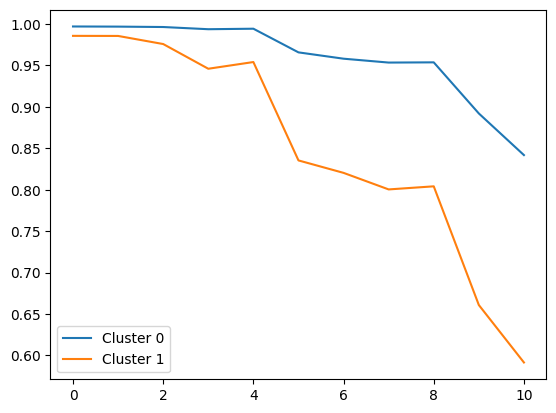

In [ ]:
reativeClustering = a.clusting("Relative_Accessibility", 3)
giniClustering = a.clusting("M2SFCA_Gini", 2)

TypeError: no numeric data to plot

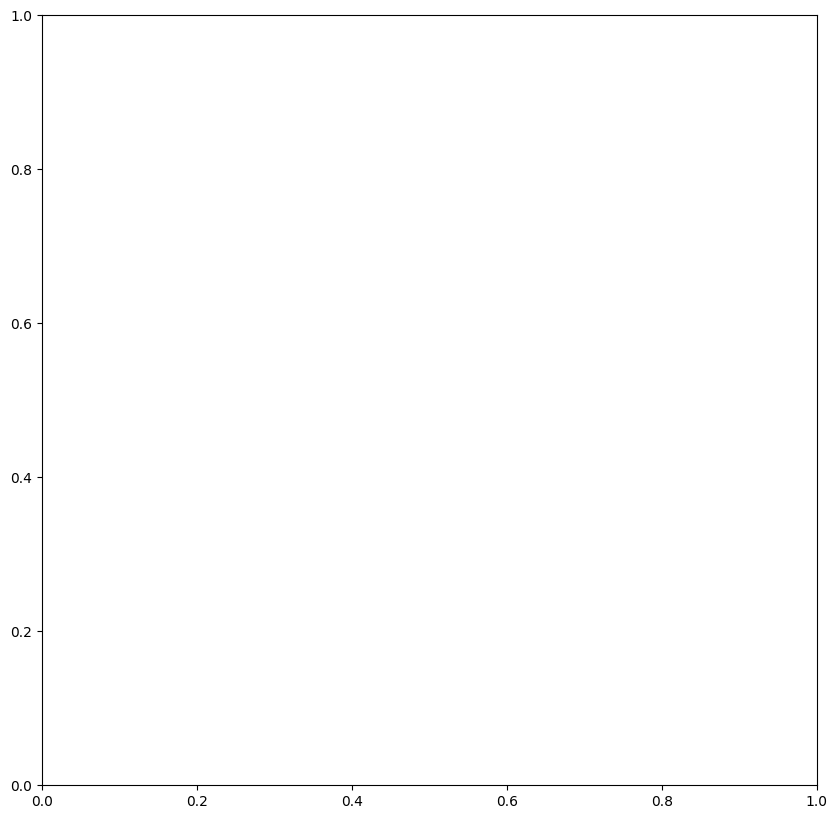

In [7]:
from DataProcess.drawBasicMap import drawClusting
drawClusting(RESULT.copy(), gpd.read_file(r"China_Acc_Results\\Result\\city_with_clusting.csv", encoding='utf-8'))

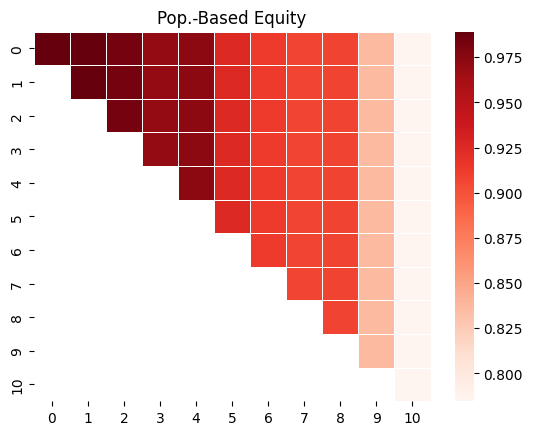

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gini cohort
matrix = []
for i in range(2015, 2026):
    cohort = [0.0] * (i - 2015)
    label = "M2SFCA_Gini_{}".format(i)
    data = RESULT[RESULT[label] != 0]
    for j in range(i, 2026):
        label2 = "M2SFCA_Gini_{}".format(j)
        cohort.append(data[label2].mean())
    matrix.append(cohort)

# 转换为numpy数组并将0值设为NaN
matrix = np.array(matrix, dtype=float)
matrix[matrix == 0] = np.nan

sns.heatmap(
    matrix,
    cmap="Reds", # 蓝色系配色
    linewidths=.5, # 单元格边框
    mask = 0,
) 

# 添加标题
plt.title("Pop.-Based Equity")

# 显示图形
plt.show()
